# HR ANALYTICS: JOB CHANGE OF DATA SCIENTISTS

In [1]:
#Load Libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Load datasets
df1 = pd.read_csv("C:/Users/HP/Desktop/Co_Grammar/aug_train.csv")
df2 = pd.read_csv("C:/Users/HP/Desktop/Co_Grammar/aug_test.csv")

# 1. Data Analysis and Visualization

In [3]:
df1.head() #A pip into the train data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df2.head() #A pip into the test data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [7]:
df1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
df2.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [9]:
df1.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
df2.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [11]:
df1.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [12]:
df2.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [13]:
print('df1 shape: ', df1.shape)

df1 shape:  (19158, 14)


In [14]:
print('df2 shape: ', df2.shape)

df2 shape:  (2129, 13)


# Visualizations

<AxesSubplot:xlabel='target', ylabel='count'>

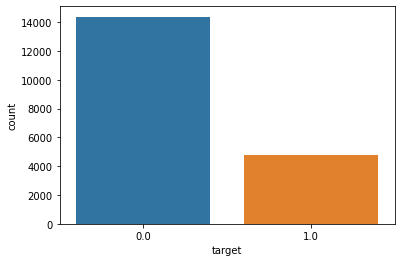

In [15]:
sns.countplot(df1.target) #Churn vs. normal 

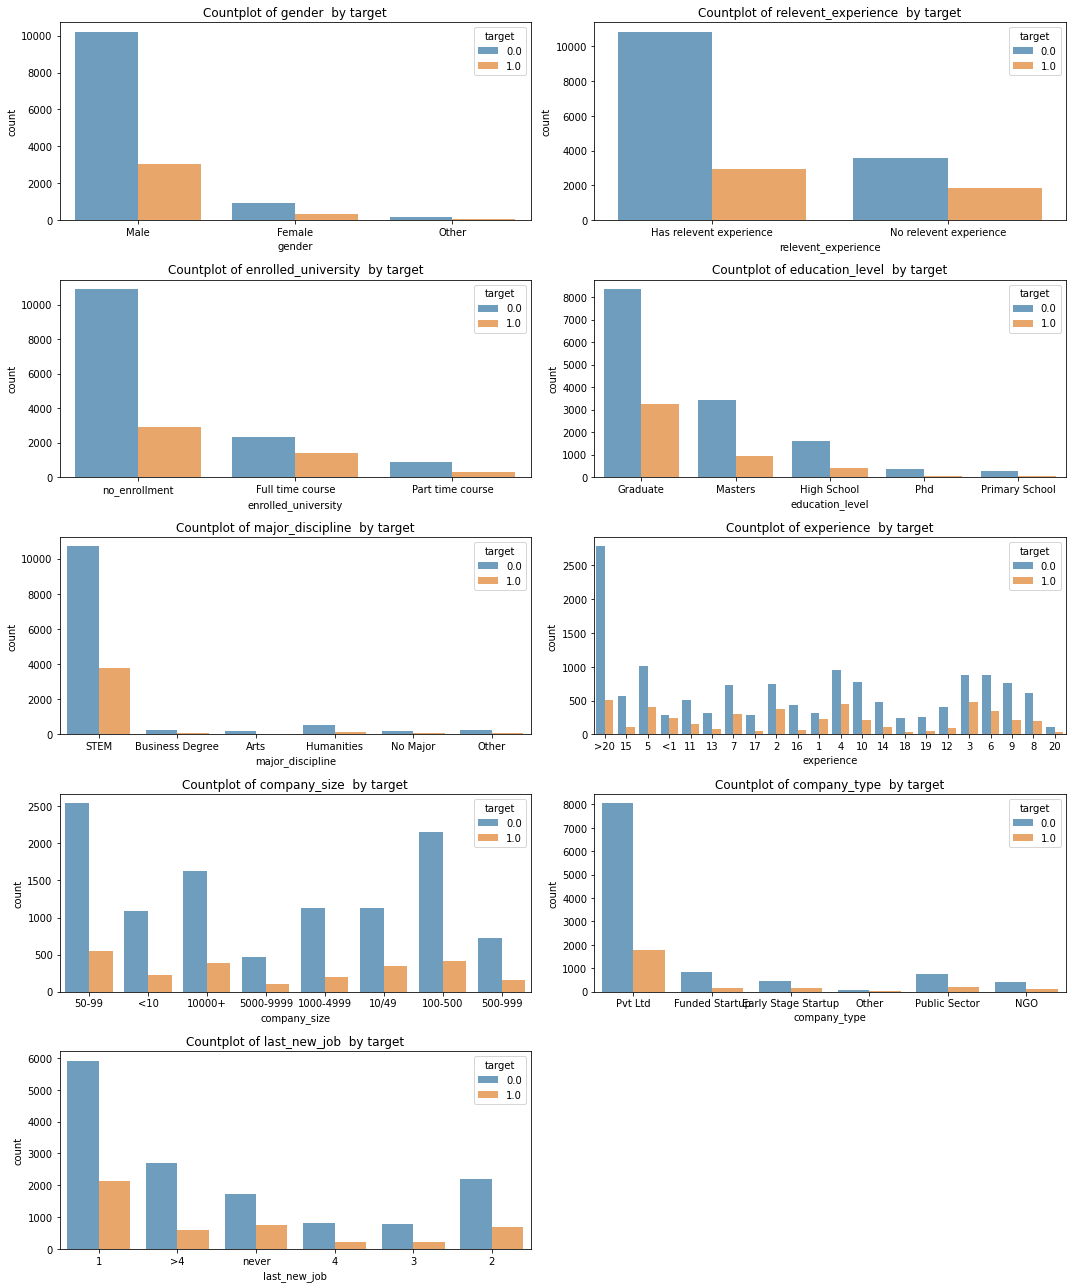

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

In [16]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=df1)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

np.array(df1.columns[df1.dtypes != object])

# 2 Data Preprocessing

In [17]:
import copy
df_train=copy.deepcopy(df1)
df_test=copy.deepcopy(df2)

cols=np.array(df1.columns[df1.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

df_train.columns


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

Here, I will assign each categorical variable value a number, suppose [A, B, A, F] named values, I will map to [1, 2, 1, 3]
To do that, I uses LabelEncoder from sklearn.preprocessing package, as follows:

In [18]:
#Data Encoding
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(df1.columns[df1.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test=df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols]=df1[cols]
df_test[np.delete(cols,len(cols)-1)]=df1[np.delete(cols,len(cols)-1)]

In [19]:
df_train.dtypes

city                        int32
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object

In [20]:
df_test.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap of all the Features of Train data set')

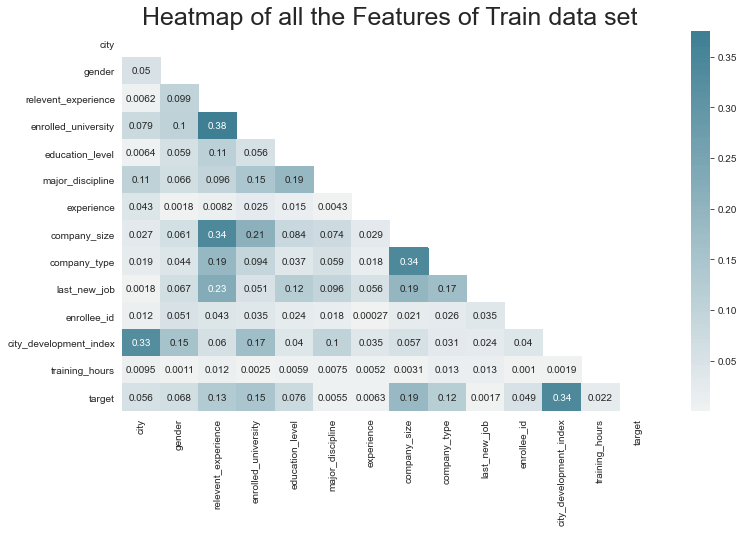

In [21]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr().apply(abs), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr().apply(abs), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, )
plt.title("Heatmap of all the Features of Train data set", fontsize = 25)

From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science.

<AxesSubplot:xlabel='target', ylabel='training_hours'>

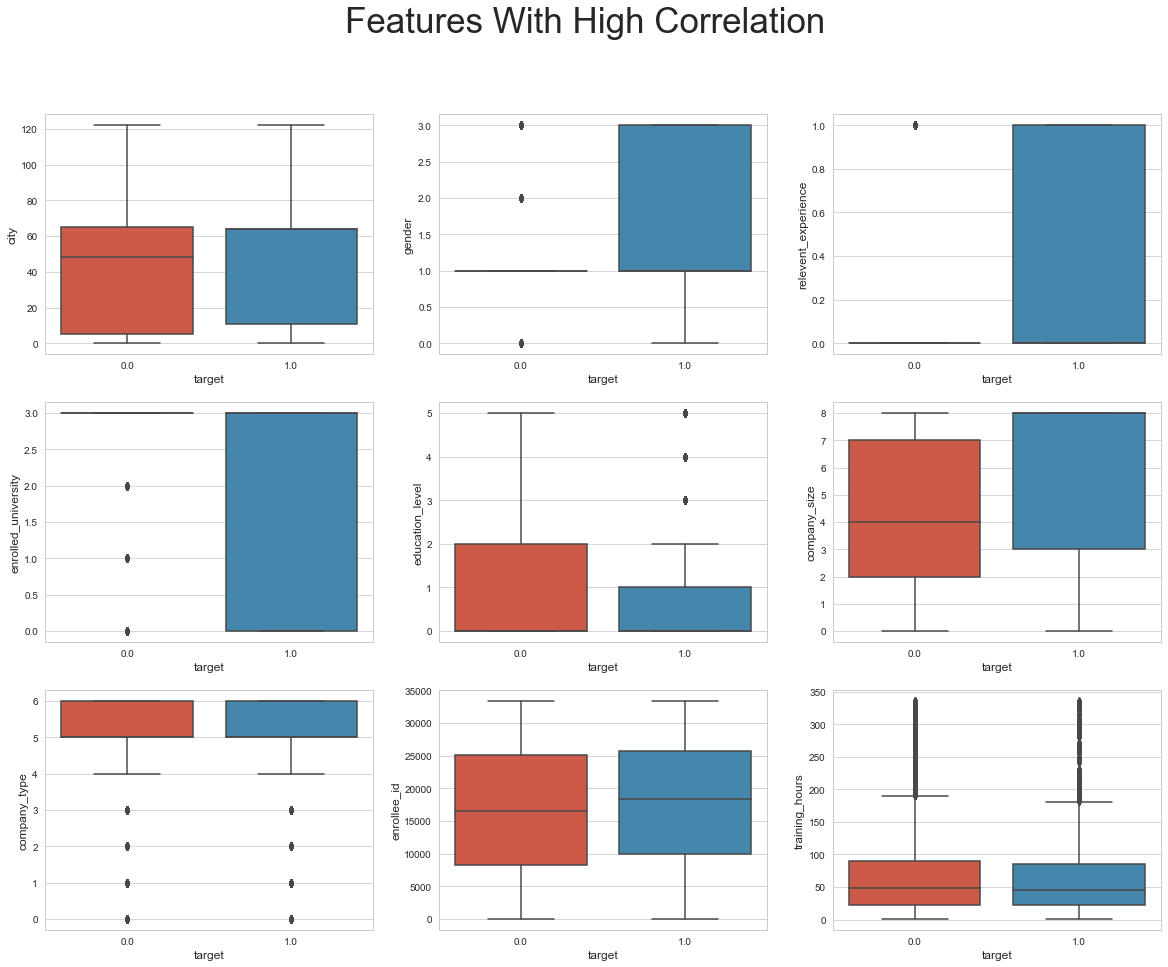

In [22]:
# visualizing the features with positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])

In [23]:
counts = df1.target.value_counts()
not_change = counts[0]
change = counts[1]
perc_not_change = not_change*100/ sum(counts)
perc_change = change*100/ sum(counts)
print('There were {} not_change ({:.2f}%) and {} change ({:.2f}%).'.format(not_change, perc_not_change, change, perc_change))

There were 14381 not_change (75.07%) and 4777 change (24.93%).


From this we can clearly see that the target 0 is in majority which will effect our model so we will use SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1 :)

# Dealing with Data Imbalance using SMOTE

In [24]:
X=df_train.drop(columns=['target']).values #Predictor Variables
y=df_train['target'].values #Response Variable

In [25]:
def oversample(X, y, ss=1):
    from collections import Counter
    from imblearn.over_sampling import SVMSMOTE
    from numpy import where

# summarize class distribution
    print("Original class distribution:")
    counter = Counter(y)
    print(counter)
    
# transform the dataset
    X, y = SVMSMOTE(sampling_strategy=ss,n_jobs=-1).fit_resample(X, y)
    
    print("Over sampling done using SVM SMOTE.\nNew class distribution is:")
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    
    return X, y

In [26]:
X, y = oversample(X,y)

Original class distribution:
Counter({0.0: 14381, 1.0: 4777})
Over sampling done using SVM SMOTE.
New class distribution is:
Counter({1.0: 14381, 0.0: 14381})


# 3. Model Training and Evaluation

In [27]:
# imports for training and evaluation
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Splitting data into train and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print("Data splitting complete")

Data splitting complete


In [29]:
# helper functions
def evaluate(model, X, y):
    preds = model.predict(X)
    
    labels = [0,1]
    target_names = ["not_change","change"]
    
    cm = confusion_matrix(y, preds)
    cr = classification_report(y, preds, labels=labels, target_names=target_names)
    
    fig, ax = plt.subplots()
    print(cr)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    plt.show()
    
    return preds
    
def test_model(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, scorer=None):
    model.fit(X_train,y_train)
        
    train_preds = evaluate(model, X_train, y_train)
    test_preds = evaluate(model, X_test, y_test)
    
    return train_preds, test_preds

def plot_preds(model_names, y_true, preds_list, show_value=False, scorer='accuracy'):
    xval = model_names
    if scorer=='accuracy':
        yval = [accuracy_score(y_true, y_pred) for y_pred in preds_list]
    elif scorer in ['f1 score','f1']:
        yval = [f1_score(y_true, y_pred) for y_pred in preds_list]
    plt.figure(figsize=(12,6))
    plt.ylim(ymax = min(100,max(yval)*1.1), ymin = min(yval)*0.8)
    plt.ylabel(scorer)
    plt.xticks(rotation=45)
    
    s = sns.barplot(xval,yval)
    if show_value:
        for x,y in zip(range(len(yval)),yval):
            s.text(x,y+0.1,round(y,2),ha="center")

In [30]:
train_preds = dict()
test_preds = dict()

# Training Base Models

# A. Logistic Regression

              precision    recall  f1-score   support

  not_change       0.61      0.58      0.60     10798
      change       0.60      0.63      0.62     10773

    accuracy                           0.61     21571
   macro avg       0.61      0.61      0.61     21571
weighted avg       0.61      0.61      0.61     21571



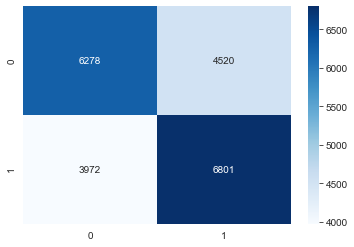

              precision    recall  f1-score   support

  not_change       0.62      0.59      0.60      3583
      change       0.61      0.64      0.63      3608

    accuracy                           0.61      7191
   macro avg       0.61      0.61      0.61      7191
weighted avg       0.61      0.61      0.61      7191



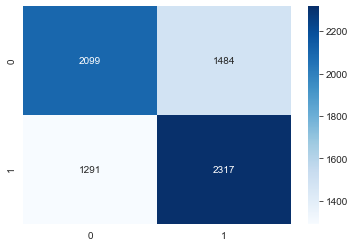

In [31]:
train_preds["LR"],test_preds["LR"] = test_model(LogisticRegression());

# B. SVM - Support Vector Classifier

              precision    recall  f1-score   support

  not_change       0.57      0.42      0.48     10798
      change       0.54      0.68      0.60     10773

    accuracy                           0.55     21571
   macro avg       0.55      0.55      0.54     21571
weighted avg       0.55      0.55      0.54     21571



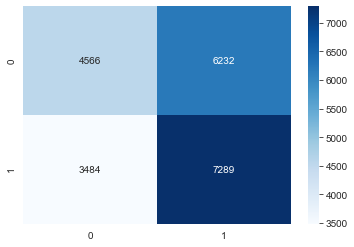

              precision    recall  f1-score   support

  not_change       0.58      0.44      0.50      3583
      change       0.55      0.68      0.61      3608

    accuracy                           0.56      7191
   macro avg       0.56      0.56      0.55      7191
weighted avg       0.56      0.56      0.55      7191



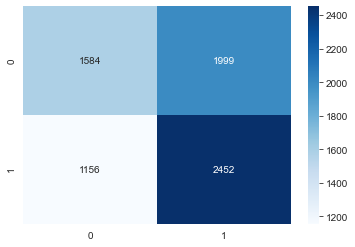

In [32]:
train_preds["SVC"],test_preds["SVC"] = test_model(SVC());

 # C. kNN (k- Nearest Neighbors)

              precision    recall  f1-score   support

  not_change       0.85      0.77      0.81     10798
      change       0.79      0.87      0.83     10773

    accuracy                           0.82     21571
   macro avg       0.82      0.82      0.82     21571
weighted avg       0.82      0.82      0.82     21571



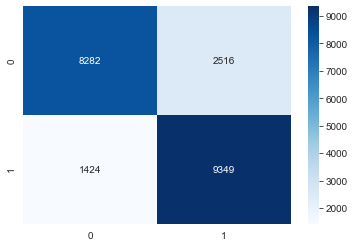

              precision    recall  f1-score   support

  not_change       0.75      0.66      0.70      3583
      change       0.70      0.78      0.74      3608

    accuracy                           0.72      7191
   macro avg       0.72      0.72      0.72      7191
weighted avg       0.72      0.72      0.72      7191



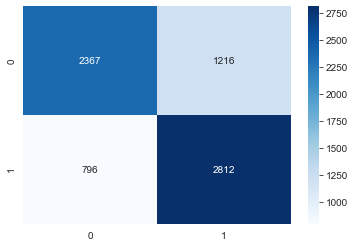

In [33]:
train_preds["KNN"],test_preds["KNN"] = test_model(KNeighborsClassifier());

# D. Random Forest

              precision    recall  f1-score   support

  not_change       1.00      1.00      1.00     10798
      change       1.00      1.00      1.00     10773

    accuracy                           1.00     21571
   macro avg       1.00      1.00      1.00     21571
weighted avg       1.00      1.00      1.00     21571



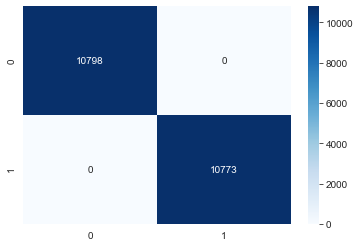

              precision    recall  f1-score   support

  not_change       0.85      0.88      0.86      3583
      change       0.87      0.84      0.86      3608

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191



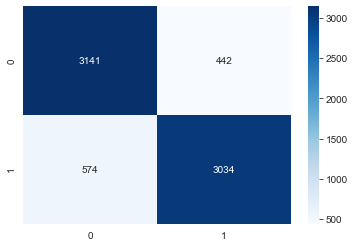

In [34]:
train_preds["RF"],test_preds["RF"] = test_model(RandomForestClassifier());

# E. Light GBM

              precision    recall  f1-score   support

  not_change       0.88      0.89      0.89     10798
      change       0.89      0.88      0.88     10773

    accuracy                           0.89     21571
   macro avg       0.89      0.89      0.89     21571
weighted avg       0.89      0.89      0.89     21571



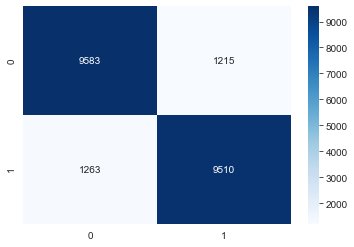

              precision    recall  f1-score   support

  not_change       0.86      0.87      0.87      3583
      change       0.87      0.86      0.87      3608

    accuracy                           0.87      7191
   macro avg       0.87      0.87      0.87      7191
weighted avg       0.87      0.87      0.87      7191



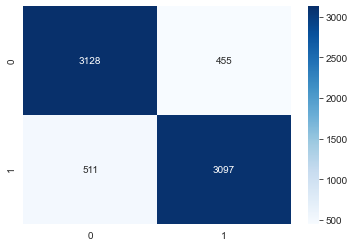

In [35]:
train_preds["LGBM"],test_preds["LGBM"] = test_model(LGBMClassifier());

# Evaluation of Base Models

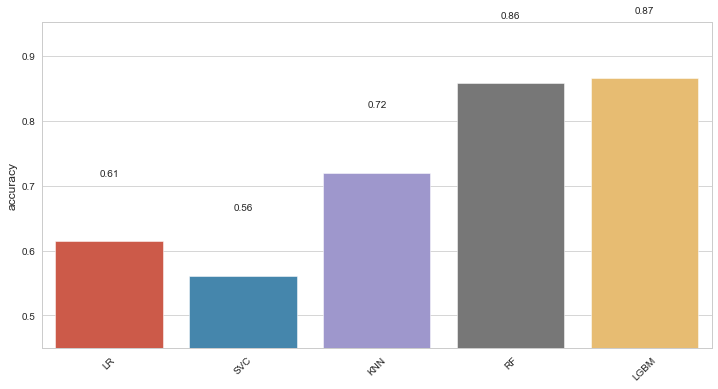

In [36]:
plot_preds(list(test_preds.keys()),y_test,list(test_preds.values()), 1)

# Hyperparameter Tuning

In [37]:
# helper functions
def best_params(model, grid, X_train=X_train, y_train=y_train):
    gscv=GridSearchCV(model,grid,scoring=make_scorer(f1_score),n_jobs=-1, verbose=1)
    grid_search=gscv.fit(X_train,y_train)
    bp = grid_search.best_params_ 
    print("\nBest Params for {}:".format(model))
    for k in bp:
        print(k,":",bp[k])
    print()
    return bp

In [38]:
tuned_train_preds = dict()
tuned_test_preds = dict()

# A. Logistic Regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Params for LogisticRegression():
C : 0.1
penalty : l2
solver : newton-cg

              precision    recall  f1-score   support

  not_change       0.73      0.76      0.75     10798
      change       0.75      0.72      0.73     10773

    accuracy                           0.74     21571
   macro avg       0.74      0.74      0.74     21571
weighted avg       0.74      0.74      0.74     21571



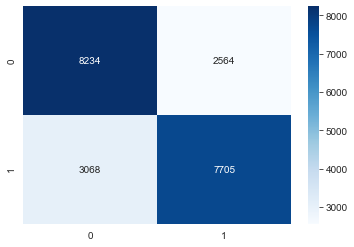

              precision    recall  f1-score   support

  not_change       0.73      0.77      0.75      3583
      change       0.76      0.72      0.74      3608

    accuracy                           0.75      7191
   macro avg       0.75      0.75      0.75      7191
weighted avg       0.75      0.75      0.75      7191



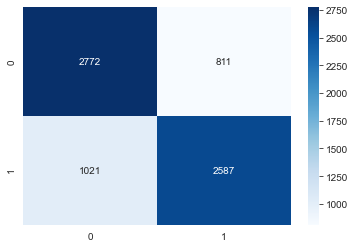

In [39]:
model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

tuned_train_preds["LR"],tuned_test_preds["LR"] = test_model(LogisticRegression(**best_params(model,grid)));

# B. SVM

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Params for SVC():
C : 0.1

              precision    recall  f1-score   support

  not_change       0.57      0.40      0.47     10798
      change       0.54      0.69      0.60     10773

    accuracy                           0.55     21571
   macro avg       0.55      0.55      0.54     21571
weighted avg       0.55      0.55      0.54     21571



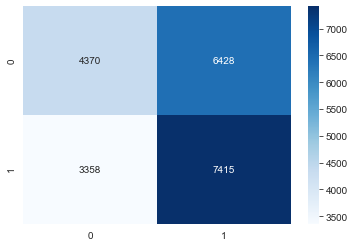

              precision    recall  f1-score   support

  not_change       0.58      0.42      0.49      3583
      change       0.55      0.69      0.61      3608

    accuracy                           0.56      7191
   macro avg       0.56      0.56      0.55      7191
weighted avg       0.56      0.56      0.55      7191



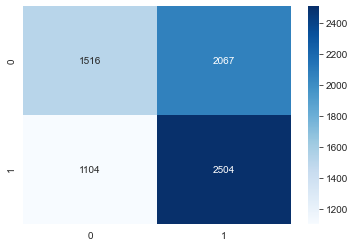

In [40]:
model = SVC()

C = [1.0, 0.1, 0.01, 0.05, 0.001]

grid = dict(C=C)

tuned_train_preds["SVC"],tuned_test_preds["SVC"] = test_model(SVC(**best_params(model,grid)));

# C. K-Nearest Neighbors

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Params for KNeighborsClassifier():
metric : manhattan
n_neighbors : 9
weights : distance

              precision    recall  f1-score   support

  not_change       1.00      1.00      1.00     10798
      change       1.00      1.00      1.00     10773

    accuracy                           1.00     21571
   macro avg       1.00      1.00      1.00     21571
weighted avg       1.00      1.00      1.00     21571



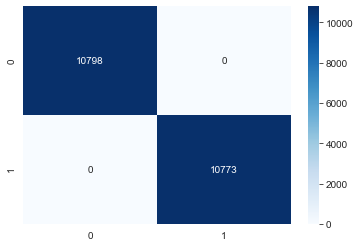

              precision    recall  f1-score   support

  not_change       0.81      0.67      0.74      3583
      change       0.72      0.84      0.78      3608

    accuracy                           0.76      7191
   macro avg       0.77      0.76      0.76      7191
weighted avg       0.77      0.76      0.76      7191



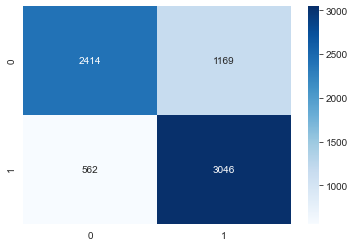

In [42]:
model = KNeighborsClassifier()

n_neighbors = [9,11,13,15]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

tuned_train_preds["KNN"],tuned_test_preds["KNN"] = test_model(KNeighborsClassifier(**best_params(model,grid)));

# D. Random Forest

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Params for RandomForestClassifier():
max_depth : None
min_samples_split : 9
n_estimators : 500

              precision    recall  f1-score   support

  not_change       0.93      0.98      0.96     10798
      change       0.98      0.93      0.96     10773

    accuracy                           0.96     21571
   macro avg       0.96      0.96      0.96     21571
weighted avg       0.96      0.96      0.96     21571



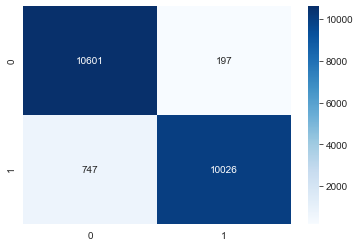

              precision    recall  f1-score   support

  not_change       0.85      0.87      0.86      3583
      change       0.86      0.85      0.86      3608

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191



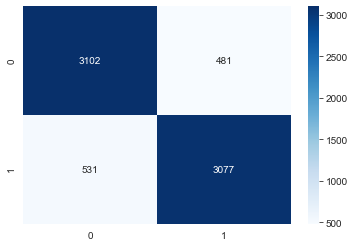

In [43]:
model = RandomForestClassifier()

n_estimators = [50, 100, 500]
max_features = ['auto','sqrt', 'log2']
max_depth = [5,8,10,None]
min_samples_split = [3,5,7,9]
grid = dict(n_estimators=n_estimators,# max_features=max_features,
            max_depth=max_depth,min_samples_split=min_samples_split)

tuned_train_preds["RF"],tuned_test_preds["RF"] = test_model(RandomForestClassifier(**best_params(model,grid)));

# E. LightGBM

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Params for LGBMClassifier():
learning_rate : 0.1
max_depth : 5
n_estimators : 160
subsample : 0.5

              precision    recall  f1-score   support

  not_change       0.87      0.88      0.88     10798
      change       0.88      0.87      0.88     10773

    accuracy                           0.88     21571
   macro avg       0.88      0.88      0.88     21571
weighted avg       0.88      0.88      0.88     21571



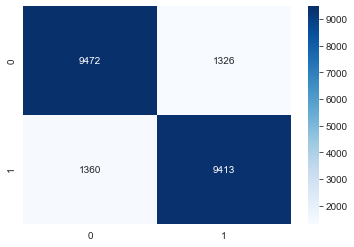

              precision    recall  f1-score   support

  not_change       0.86      0.87      0.87      3583
      change       0.87      0.85      0.86      3608

    accuracy                           0.86      7191
   macro avg       0.86      0.86      0.86      7191
weighted avg       0.86      0.86      0.86      7191



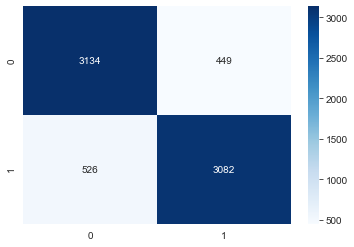

In [44]:
model = LGBMClassifier()

n_estimators = [40, 80, 160]
learning_rate = [0.01, 0.05, 0.1, 0.5]
max_depth = [5,7,9]
subsample = [0.5,0.7,0.9]
grid = dict(n_estimators=n_estimators,learning_rate=learning_rate,
            max_depth=max_depth,subsample=subsample)

tuned_train_preds["LGBM"],tuned_test_preds["LGBM"] = test_model(LGBMClassifier(**best_params(model,grid)));

# Evaluation of Tuned Models

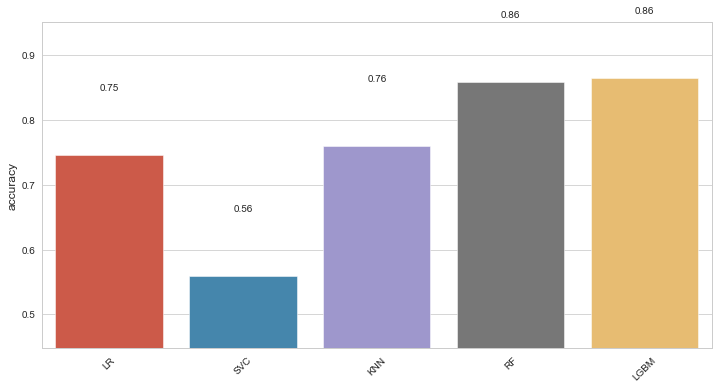

In [45]:
plot_preds(list(tuned_test_preds.keys()),y_test,list(tuned_test_preds.values()), 1)